### The flag Churn means that the customer churns in 1 months from now
### This means that the CHURN flag needs to be set on a CERTAIN TIMESTAMP 
### and that the predictions need to be computed on a CERTAIN TIMESTAMP

one dataframe for customer data : customer, start date, end date
one dataframe for predictions: day, customer, churn flag

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
pd.set_option('display.max_rows',None)

There are 1000 accounts. 
Each one starts on a randomn day between 1,1,2020 and 1,1,2022.
The averagetenure is 300 days but varies with size and industry

In [2]:
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

## I want to compute for Q1 of 2021, which customer will churn 1 month from now

In [3]:
dates = pd.date_range(dt.date(2021,4,1), dt.date(2021,7,1))
dates

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12',
               '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
               '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02',
               '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
               '2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10',
               '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
               '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
      

In [4]:
start = pd.to_datetime('2018-01-01')
end = pd.to_datetime('2022-01-01')

accounts = np.random.randint(0,100000,1000)
startdates = random_dates(start, end, n=1000)
sizes = np.random.choice(['Large','Small'], 1000, p=[0.2, 0.8])
industries = np.random.choice(['Construction','Manufacturing','PublicSector','Military','Other'], 1000, p=[0.1, 0.25, 0.46, 0.15,0.04])
randel = np.random.normal(0,30, 1000).astype(np.int)
shorttenure = np.random.normal(300,60,1000).astype(np.int)
longtenure = np.random.normal(400,75,1000).astype(np.int)

In [5]:
df = pd.DataFrame()
df['accounts'] = accounts
df['startdate'] = startdates
df['size'] = sizes
df['longtenure'] = longtenure
df['shorttenure'] = shorttenure
df['industry'] = industries
df['tenure'] = np.where(df['size']=='Large', df['longtenure'], df['shorttenure'])
df['tenure'] = np.where(df['industry']=='Construction', df['tenure']+randel, df['tenure'])
df['tenure'] = np.where(df['industry']=='Manufacturing', df['tenure']+2*randel, df['tenure'])
df['tenure'] = np.where(df['industry']=='PublicSector', df['tenure']+3*randel, df['tenure'])
df['tenure'] = np.where(df['industry']=='Military', df['tenure']+4*randel, df['tenure'])
df['enddate'] = df.apply(lambda x: x['startdate'] + dt.timedelta(x['tenure']), axis=1)
df = df[['accounts','startdate','size','industry','tenure','enddate']]

### Assigning churn to customers churning in the following month

In [6]:
mydates = []
customers = []
churn = []

for date in dates:
    for i in range(len(df)):
        if date > df['enddate'].iloc[i]:
            continue
        elif date > df['enddate'].iloc[i]-dt.timedelta(30):
            mydates.append(date)
            customers.append(df['accounts'].iloc[i])
            churn.append('Churn')
        elif (date > df['startdate'].iloc[i]) & (date < (df['enddate'].iloc[i]-dt.timedelta(30))):
            mydates.append(date)
            customers.append(df['accounts'].iloc[i])
            churn.append('Active')

In [7]:
ch = pd.DataFrame({'Dates': mydates, 'AccountID': customers, 'Churn': churn})
ch.head()

,Dates,AccountID,Churn
0,2021-04-01,46147,Active
1,2021-04-01,52694,Active
2,2021-04-01,1206,Active
3,2021-04-01,89471,Active
4,2021-04-01,51803,Active


In [8]:
dfall = ch.merge(df, left_on='AccountID', right_on='accounts', how='left')

In [9]:
dfall['Tenure'] = (dfall['Dates'] - dfall['startdate']).dt.days
dfall.sample(3)

,Dates,AccountID,Churn,accounts,startdate,size,industry,tenure,enddate,Tenure
3755,2021-04-16,85769,Active,85769,2020-01-21 22:21:41,Large,PublicSector,618,2021-09-30 22:21:41,450
7226,2021-05-01,51479,Active,51479,2021-04-08 03:08:17,Small,Construction,312,2022-02-14 03:08:17,22
5225,2021-04-22,82207,Active,82207,2021-04-20 23:22:02,Small,PublicSector,406,2022-05-31 23:22:02,1


In [11]:
dfall[dfall['Dates']=='2021-05-08'].sample(3)

,Dates,AccountID,Churn,accounts,startdate,size,industry,tenure,enddate,Tenure
8864,2021-05-08,11153,Churn,11153,2020-09-29 23:23:39,Small,PublicSector,221,2021-05-08 23:23:39,220
8933,2021-05-08,50748,Active,50748,2020-06-28 03:17:33,Small,PublicSector,396,2021-07-29 03:17:33,313
8898,2021-05-08,43132,Churn,43132,2020-06-18 16:55:58,Small,PublicSector,342,2021-05-26 16:55:58,323



Bad key "text.kerning_factor" on line 4 in
/Users/fabrizio/anaconda3/envs/DATA/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


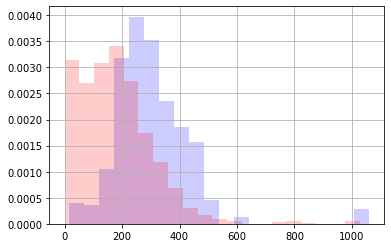

In [12]:
dfall[dfall['Churn']=='Churn'].Tenure.hist(alpha=0.2, bins=20, density=True, color='blue')
dfall[dfall['Churn']=='Active'].Tenure.hist(alpha=0.2, bins=20, density=True, color='red')


In [13]:
dfall.to_csv('SynthDataChurnQ2.csv', index=None)